In [27]:
from __future__ import print_function
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import RMSprop, Adadelta
import matplotlib.pyplot as plt

In [38]:
# Parameters
batch_size = 128
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data Exploration


x_train shape: (60000, 28, 28, 1)
60000 train samples, 10000 test samples


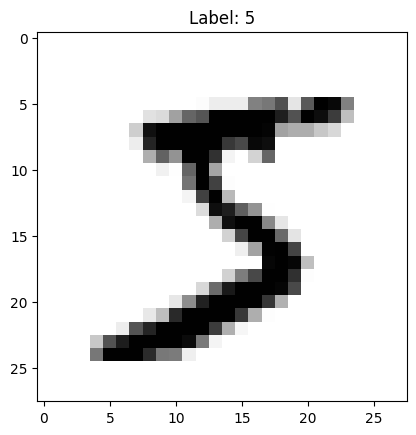

In [39]:
# Reshape based on image data format
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *input_shape)
x_test = x_test.reshape(x_test.shape[0], *input_shape)

# Normalize and one-hot encode
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255
y_train, y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)

print(f'x_train shape: {x_train.shape}')
print(f'{x_train.shape[0]} train samples, {x_test.shape[0]} test samples')

# Display an example image
plt.imshow(x_train[0].reshape(img_rows, img_cols), cmap=plt.cm.binary)
plt.title(f'Label: {y_train[0].argmax()}')
plt.show()

## Multi-Layer Perceptron (MLP)


In [40]:
# Multi-Layer Perceptron (MLP)
mlp_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(num_classes, activation='softmax')
])
print("\nMLP Model Summary:")
mlp_model.summary()


MLP Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
mlp_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

x_train_mlp = x_train.reshape(x_train.shape[0], -1)
x_test_mlp = x_test.reshape(x_test.shape[0], -1)
mlp_model.fit(x_train_mlp, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test_mlp, y_test))
mlp_score = mlp_model.evaluate(x_test_mlp, y_test)
print(f'MLP Test loss: {mlp_score[0]} | Test accuracy: {mlp_score[1]}')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.4423 - val_accuracy: 0.9547 - val_loss: 0.1469
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1165 - val_accuracy: 0.9743 - val_loss: 0.0893
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0770 - val_accuracy: 0.9753 - val_loss: 0.0777
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0527 - val_accuracy: 0.9785 - val_loss: 0.0683
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0369 - val_accuracy: 0.9806 - val_loss: 0.0609
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9918 - loss: 0.0273 - val_accuracy: 0.9793 - val_loss: 0.0636
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0216 - val_accuracy: 0.9812 - val_loss: 0.0635
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9953 - loss: 0.0172 - val_accuracy: 0.

In [42]:
# Convolutional Neural Network (CNN)
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
print("\nCNN Model Summary:")
cnn_model.summary()


CNN Model Summary:


/home/nissim/snap/code/176/.local/share/virtualenvs/musa-650-spring-2025-BY6WbUPk/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
cnn_score = cnn_model.evaluate(x_test, y_test)
print(f'CNN Test loss: {cnn_score[0]} | Test accuracy: {cnn_score[1]}')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.1414 - loss: 2.2899 - val_accuracy: 0.2986 - val_loss: 2.2343
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.2487 - loss: 2.2276 - val_accuracy: 0.4253 - val_loss: 2.1553
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.3359 - loss: 2.1516 - val_accuracy: 0.5396 - val_loss: 2.0538
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.4009 - loss: 2.0563 - val_accuracy: 0.6073 - val_loss: 1.9241
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.4648 - loss: 1.9362 - val_accuracy: 0.6663 - val_loss: 1.7639
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5233 - loss: 1.7882 - val_accuracy: 0.7139 - val_loss: 1.5786
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5706 - loss: 1.6268 - val_accuracy: 0.7554 - val_loss: 1.3866
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6036 - loss: 1.4756 - 